Análisis de Sentimientos en Reseñas de Películas (IMDB Movie Reviews Dataset)

## Grupo 6:

- Miguel Ángel Pablos  

- María Alejandra Olarte

- Carlos Mauricio Arteaga

## 4. Modelado

In [ ]:
import pandas as pd

In [ ]:
# Read the data from the CSV file
#df = pd.read_csv('D:\EAN_NLP\Codigo\Taller 3\df_cleaned.csv')
df = pd.read_csv('df_cleaned.csv')
df


,review,sentiment,review_length
0,one reviewers mention watch oz episode youll h...,1,1139
1,wonderful little production film technique una...,1,628
2,think wonderful way spend time hot summer week...,1,560
3,basically theres family where little boy jake ...,0,449
4,petter matteis love time money visually stun f...,1,859
...,...,...,...
49995,think movie right good job wasnt creative orig...,1,540
49996,bad plot bad dialogue bad act idiotic direct a...,0,387
49997,catholic teach parochial elementary school nun...,0,801
49998,im go disagree previous comment side maltin on...,0,807


### Conversion a vectores utilizando World2Vec

In [ ]:
### Conversion a vectores utilizando World2Vec
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
# Tokenizar las reseñas
nltk.download('punkt')  # Descargar el tokenizer de NLTK
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Tokenizar las reseñas
tokenized_reviews = [word_tokenize(review) for review in df['review']]

In [ ]:
# Entrenar el modelo Word2Vec
model = Word2Vec(sentences=tokenized_reviews, # Listas de palabras
                 vector_size=100, # Dimension de los vectores
                 window=5, # contexto (Palabras a la izquierda y la derecha)
                 min_count=5, # Ignorar palabras con menos de 5 apariciones
                 workers=4 # Número de threads
)


In [ ]:
# Explorar algunas palabras y sus embeddings
word_vectors = model.wv

similar_words = word_vectors.most_similar('good', topn=10)
similar_words

[('decent', 0.7636483311653137),
 ('great', 0.6998878121376038),
 ('bad', 0.6817688941955566),
 ('nice', 0.6289758682250977),
 ('alright', 0.6272479891777039),
 ('ok', 0.6263848543167114),
 ('okay', 0.6172659993171692),
 ('fine', 0.5989405512809753),
 ('cool', 0.5921372771263123),
 ('excellent', 0.5736892223358154)]

In [ ]:
similar_words = word_vectors.most_similar('great', topn=10)
similar_words

[('wonderful', 0.7768422961235046),
 ('excellent', 0.7692946791648865),
 ('fantastic', 0.7289782762527466),
 ('good', 0.6998876333236694),
 ('fine', 0.6951941847801208),
 ('terrific', 0.694986879825592),
 ('incredible', 0.6414716839790344),
 ('awesome', 0.6323381066322327),
 ('outstanding', 0.6304568648338318),
 ('amaze', 0.6209719181060791)]

In [ ]:
word_vectors.most_similar(positive=['great','good'],negative=['bad','waste','worst'],topn=25)

[('fine', 0.47294721007347107),
 ('excellent', 0.4671722650527954),
 ('wonderful', 0.45470699667930603),
 ('strong', 0.4463820159435272),
 ('terrific', 0.440256267786026),
 ('fantastic', 0.4149276614189148),
 ('lively', 0.39997559785842896),
 ('nicely', 0.3974706530570984),
 ('marvelous', 0.3862377107143402),
 ('fabulous', 0.37086161971092224),
 ('dynamic', 0.36511099338531494),
 ('mature', 0.36459866166114807),
 ('solid', 0.3638385236263275),
 ('youthful', 0.3624110221862793),
 ('mickey', 0.36092981696128845),
 ('wonderfully', 0.36064308881759644),
 ('superb', 0.3588277995586395),
 ('warmth', 0.3580639660358429),
 ('effectively', 0.35606443881988525),
 ('delightful', 0.3557259142398834),
 ('nice', 0.35518816113471985),
 ('brood', 0.35506483912467957),
 ('frank', 0.3545737862586975),
 ('colorful', 0.35251855850219727),
 ('overton', 0.3514004647731781)]

In [ ]:
word_vectors.most_similar(positive=['waste','worst'],negative=['great','good'],topn=25)

[('dreck', 0.46660593152046204),
 ('garbage', 0.46273189783096313),
 ('misfortune', 0.45605045557022095),
 ('tripe', 0.44451767206192017),
 ('drivel', 0.4366779029369354),
 ('turd', 0.43435850739479065),
 ('pile', 0.42346203327178955),
 ('waist', 0.41988804936408997),
 ('displeasure', 0.41946011781692505),
 ('dumbest', 0.4145798683166504),
 ('stupidest', 0.4144231975078583),
 ('utter', 0.40543287992477417),
 ('washout', 0.39785853028297424),
 ('longest', 0.3920549154281616),
 ('mindnumbingly', 0.38202282786369324),
 ('utterly', 0.3799155652523041),
 ('abomination', 0.3776838779449463),
 ('heap', 0.3774862289428711),
 ('nonsense', 0.3733839988708496),
 ('excrement', 0.3729214370250702),
 ('fabrication', 0.36998480558395386),
 ('cheesiest', 0.36586421728134155),
 ('droppings', 0.3655024468898773),
 ('celluloid', 0.3632117807865143),
 ('por', 0.36106041073799133)]

In [ ]:
word_vectors.most_similar(positive=['act','great'],negative=['bad'],topn=25)

[('terrific', 0.5550090074539185),
 ('wonderful', 0.554392397403717),
 ('ensemble', 0.5404919981956482),
 ('performances', 0.5324763655662537),
 ('fantastic', 0.5296626091003418),
 ('outstanding', 0.5253435969352722),
 ('excellent', 0.5196083188056946),
 ('incredible', 0.5120663642883301),
 ('superb', 0.5109796524047852),
 ('exceptional', 0.5083586573600769),
 ('fabulous', 0.5055665969848633),
 ('marvelous', 0.48289912939071655),
 ('marvellous', 0.47958606481552124),
 ('tremendous', 0.46604207158088684),
 ('support', 0.4652661085128784),
 ('topnotch', 0.4645474851131439),
 ('talents', 0.4642634987831116),
 ('complement', 0.4638897776603699),
 ('comedienne', 0.4597947299480438),
 ('fine', 0.4574797749519348),
 ('performer', 0.4564704895019531),
 ('kudos', 0.4558539092540741),
 ('firstrate', 0.4413958191871643),
 ('notch', 0.44043558835983276),
 ('wellwritten', 0.4358571469783783)]

In [ ]:
word_vectors.most_similar(positive=['script'],negative=['bad'],topn=25)

[('screenplay', 0.6158057451248169),
 ('narrative', 0.5250580310821533),
 ('storytelling', 0.5007871389389038),
 ('characterizations', 0.46532028913497925),
 ('craft', 0.455949991941452),
 ('novel', 0.4404926598072052),
 ('proceedings', 0.44041699171066284),
 ('direction', 0.4370128810405731),
 ('clarity', 0.4332450032234192),
 ('filmic', 0.43063709139823914),
 ('characterization', 0.4257826805114746),
 ('interplay', 0.4237515926361084),
 ('novels', 0.42105168104171753),
 ('adaptation', 0.41586190462112427),
 ('text', 0.4154837131500244),
 ('wenders', 0.4150538742542267),
 ('dialogue', 0.4134257137775421),
 ('finesse', 0.4126146137714386),
 ('structure', 0.40836960077285767),
 ('rendition', 0.40673747658729553),
 ('characterisation', 0.4058542251586914),
 ('enthusiasm', 0.4036773443222046),
 ('poem', 0.4022544324398041),
 ('prose', 0.4009527564048767),
 ('interpretation', 0.399971067905426)]

In [ ]:
word_vectors.most_similar(positive=['script'],negative=['great'],topn=25)

[('dialogue', 0.5774068236351013),
 ('screenplay', 0.5764421820640564),
 ('dialog', 0.5110375285148621),
 ('awfully', 0.509478747844696),
 ('painfully', 0.5054618716239929),
 ('mess', 0.5036036372184753),
 ('utterly', 0.5027645826339722),
 ('embarrassingly', 0.4997637867927551),
 ('excruciatingly', 0.4897455871105194),
 ('unimaginative', 0.4863804578781128),
 ('pedestrian', 0.4810647666454315),
 ('execution', 0.4779035449028015),
 ('dialogs', 0.4776422381401062),
 ('ridiculously', 0.4756563603878021),
 ('horribly', 0.4730533957481384),
 ('insipid', 0.47213423252105713),
 ('scenario', 0.4690999388694763),
 ('mishmash', 0.46827536821365356),
 ('storyline', 0.4651692509651184),
 ('mindnumbingly', 0.4634435772895813),
 ('appallingly', 0.4608227014541626),
 ('cliched', 0.45861178636550903),
 ('setup', 0.4579820930957794),
 ('drivel', 0.4562060832977295),
 ('direction', 0.4522557258605957)]

## Palabras y su cercania (Metodo PCA)

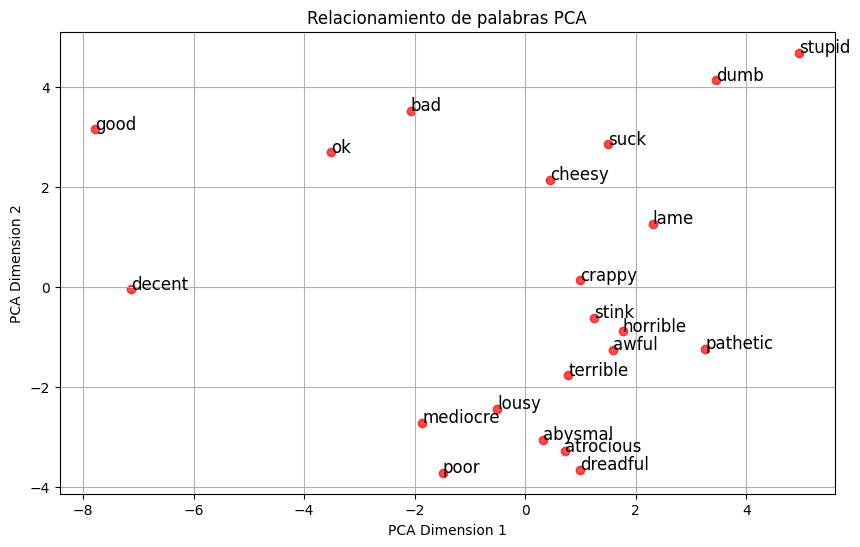

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Seleccionar palabras relevantes para la visualización
target_word = "bad"
if target_word in word_vectors.key_to_index:
    similar_words = word_vectors.most_similar(target_word, topn=20)
    words = [target_word] + [word for word, _ in similar_words]
else:
    words = []

# Obtener los vectores correspondientes a las palabras seleccionadas
word_embeddings = [word_vectors[word] for word in words]

# Reducir la dimensionalidad a 2D usando PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(word_embeddings)

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], color='red', alpha=0.7)

# Anotar las palabras en el gráfico
for i, word in enumerate(words):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=12)

plt.title("Relacionamiento de palabras PCA")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.grid(True)
plt.show()

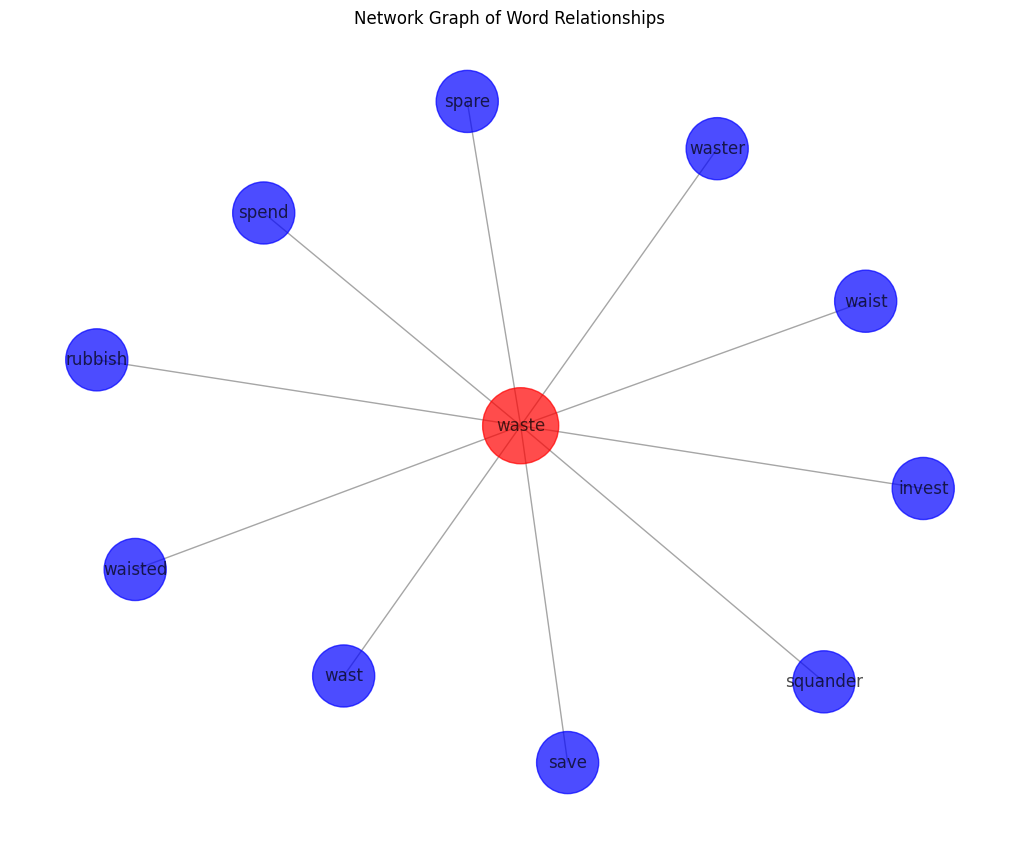

In [ ]:
import networkx as nx

# Crear un grafo para las palabras similares
network_graph = nx.Graph()

# Agregar el nodo principal (palabra objetivo)
target_word = "waste"
if target_word in word_vectors.key_to_index:
    similar_words = word_vectors.most_similar(target_word, topn=10)
    network_graph.add_node(target_word, size=3000, color='red')

    # Agregar nodos y enlaces para las palabras similares
    for word, similarity in similar_words:
        network_graph.add_node(word, size=2000, color='blue')
        network_graph.add_edge(target_word, word, weight=similarity)

# Dibujar el grafo
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(network_graph, k=0.5, seed=42)  # Layout para nodos
sizes = [network_graph.nodes[node]['size'] for node in network_graph.nodes]
colors = [network_graph.nodes[node]['color'] for node in network_graph.nodes]

nx.draw(
    network_graph, pos, with_labels=True, node_size=sizes, node_color=colors,
    font_size=12, font_color="black", edge_color="gray", alpha=0.7
)
plt.title("Network Graph of Word Relationships")
plt.show()

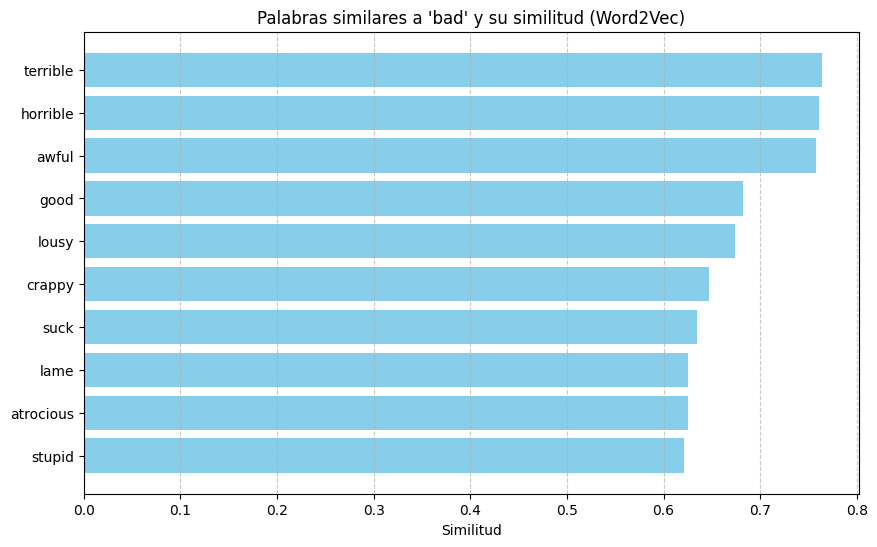

In [ ]:
# Preparar los datos para el gráfico de barras
if "bad" in word_vectors.key_to_index:
    similar_words = word_vectors.most_similar("bad", topn=10)
    words = [word for word, _ in similar_words]
    similarities = [similarity for _, similarity in similar_words]

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.barh(words, similarities, color='skyblue')
    plt.gca().invert_yaxis()  # Invertir el eje para que las barras más altas estén arriba
    plt.xlabel("Similitud")
    plt.title("Palabras similares a 'bad' y su similitud (Word2Vec)")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("La palabra 'bad' no está en el vocabulario del modelo.")

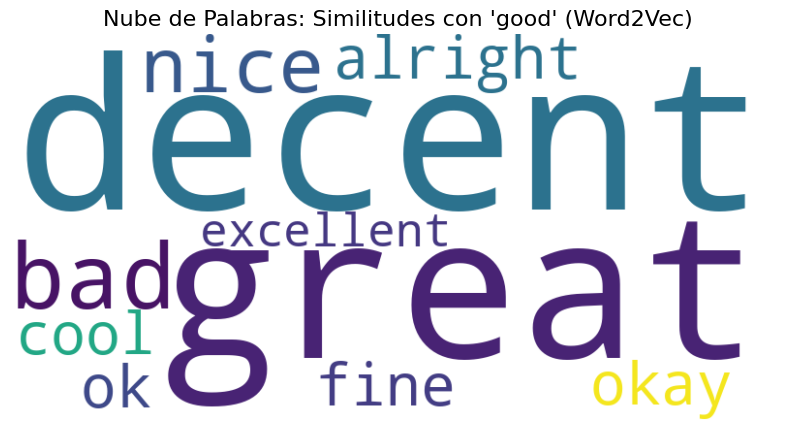

In [ ]:
from wordcloud import WordCloud

# Crear un diccionario de palabras y sus similitudes
if "good" in word_vectors.key_to_index:
    similar_words = word_vectors.most_similar("good", topn=10)
    word_similarity_dict = {word: similarity for word, similarity in similar_words}

    # Generar la nube de palabras
    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        colormap='viridis'
    ).generate_from_frequencies(word_similarity_dict)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Nube de Palabras: Similitudes con 'good' (Word2Vec)", fontsize=16)
    plt.show()
else:
    print("La palabra 'good' no está en el vocabulario del modelo.")

In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [ ]:
# 1. Preprocesar las etiquetas
df['label'] = df['sentiment']  # Usa tu columna 'sentiment' como etiquetas
texts = df['review'].tolist()
labels = df['label'].values

# 2. Usar Word2Vec para generar la matriz de embeddings
vocab_size = len(model.wv.key_to_index) + 1
embedding_dim = model.vector_size

# Crear la matriz de embeddings
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, idx in model.wv.key_to_index.items():
    embedding_matrix[idx] = model.wv[word]

# 3. Tokenizar y convertir las reseñas a secuencias de índices
tokenizer = {word: idx for idx, word in enumerate(model.wv.index_to_key)}
tokenized_reviews = [[tokenizer.get(word, 0) for word in review.split()] for review in texts]

# Padding para secuencias
max_len = 100
X = pad_sequences(tokenized_reviews, maxlen=max_len, padding='post')
y = np.array(labels)

In [ ]:
# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 4. Construcción del modelo CNN
model_cnn = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix],
              input_length=max_len, trainable=False),  # Usar Word2Vec embeddings preentrenados
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compilar el modelo
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# 5. Entrenamiento del modelo
history = model_cnn.fit(
    X_train, y_train,
    epochs=5,  # Entrenar por 5 épocas
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 43ms/step - accuracy: 0.7565 - loss: 0.5297 - val_accuracy: 0.8543 - val_loss: 0.3306
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 28ms/step - accuracy: 0.8542 - loss: 0.3403 - val_accuracy: 0.8560 - val_loss: 0.3213
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.8822 - loss: 0.2902 - val_accuracy: 0.8612 - val_loss: 0.3236
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.8940 - loss: 0.2599 - val_accuracy: 0.8618 - val_loss: 0.3376
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.9155 - loss: 0.2132 - val_accuracy: 0.8582 - val_loss: 0.3454


In [ ]:
# Resumen del modelo
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (32, 100, 100)              │       3,657,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (32, 96, 128)               │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (32, 128)                   │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 1)                     │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,875,149 (14.78 MB)

 Trainable params: 72,449 (283.00 KB)

 Non-trainable params: 3,657,800 (13.95 MB)

 Optimizer params: 144,900 (566.02 KB)

In [ ]:
# Metricas de evaluacion
loss, accuracy = model_cnn.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")




313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8547 - loss: 0.3502
Loss: 0.34541401267051697, Accuracy: 0.8582000136375427


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generar predicciones
y_pred_probs = model_cnn.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=["Negative", "Positive"])
print("\nClassification Report:\n", report)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Accuracy: 0.8582

Classification Report:
               precision    recall  f1-score   support

    Negative       0.84      0.88      0.86      4961
    Positive       0.88      0.83      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000


Confusion Matrix:
 [[4382  579]
 [ 839 4200]]


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


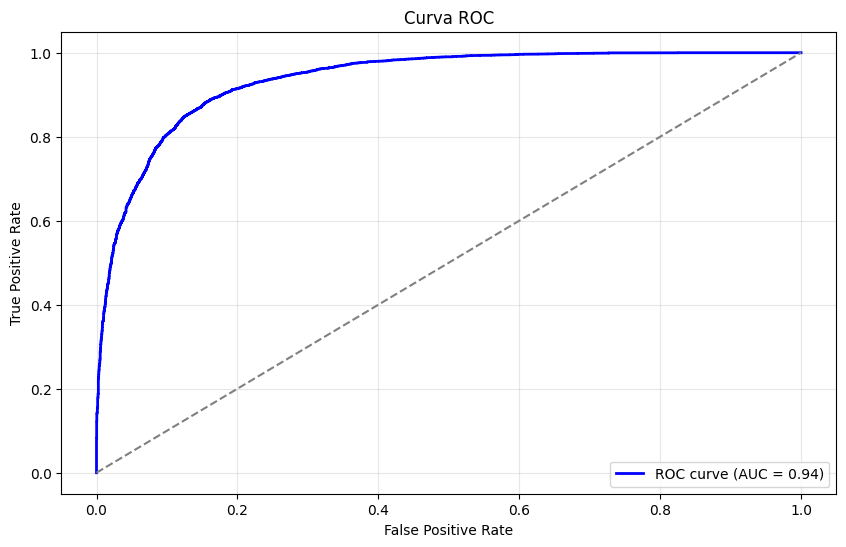

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generar las probabilidades predichas
y_pred_probs = model_cnn.predict(X_test).ravel()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea base
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Hiperparámetros definidos
FILTERS = 8
KERNEL_SIZE = 3
HIDDEN_LAYER_1_NODES = 10
HIDDEN_LAYER_2_NODES = 5
DROPOUT_PROB = 0.35
NUM_EPOCHS = 10
BATCH_SIZE = 50

# Construcción del modelo CNN
model_cnn = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix],
              trainable=False),  # Usar Word2Vec embeddings preentrenados
    Conv1D(filters=FILTERS, kernel_size=KERNEL_SIZE, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(HIDDEN_LAYER_1_NODES, activation='relu'),
    Dropout(DROPOUT_PROB),
    Dense(HIDDEN_LAYER_2_NODES, activation='relu'),
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# Compilar el modelo
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Mostrar el resumen del modelo
model_cnn.summary()

# Entrenar el modelo
history = model_cnn.fit(
    X_train, y_train,
    epochs=NUM_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    verbose=1
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │       3,657,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,657,800 (13.95 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,657,800 (13.95 MB)

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.5519 - loss: 0.9412 - val_accuracy: 0.8107 - val_loss: 0.4232
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7999 - loss: 0.4402 - val_accuracy: 0.8293 - val_loss: 0.3938
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8225 - loss: 0.3997 - val_accuracy: 0.8319 - val_loss: 0.3794
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8303 - loss: 0.3828 - val_accuracy: 0.8372 - val_loss: 0.3855
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8426 - loss: 0.3646 - val_accuracy: 0.8399 - val_loss: 0.3704
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8433 - loss: 0.3589 - val_accuracy: 0.8382 - val_loss: 0.3669
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8515 - loss: 0.3499 - val_accuracy: 0.8320 - val_loss: 0.3798
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8516 - loss: 0.3433 - val_accura

In [ ]:
# Metricas de evaluacion
loss, accuracy = model_cnn.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8453 - loss: 0.3653
Loss: 0.36269810795783997, Accuracy: 0.8434000015258789


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Generar predicciones
y_pred_probs = model_cnn.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calcular la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=["Negative", "Positive"])
print("\nClassification Report:\n", report)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy: 0.8434

Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      0.84      0.84      4961
    Positive       0.84      0.85      0.85      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000


Confusion Matrix:
 [[4157  804]
 [ 762 4277]]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


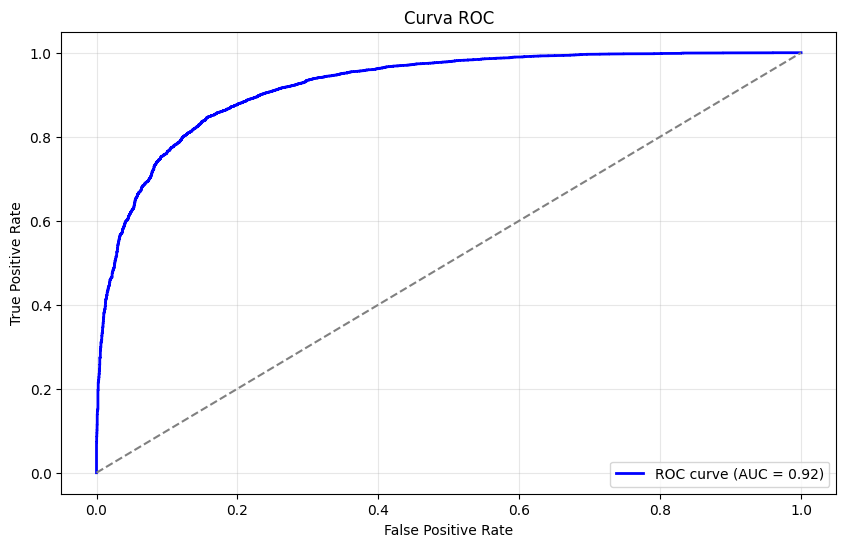

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generar las probabilidades predichas
y_pred_probs = model_cnn.predict(X_test).ravel()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea base
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()